<big> Now, the interest rate $r$ is a stochastic process that accounts for the price of the bond from time $t$ to $T$, where $T$ is the time to maturity of the zero-coupon bond

To model the interest rate $r$

<b>we can</b> use one 1 of the short rate models as discussed in this chapter as a stochastic process. 

For this purpose,

<b>we will</b> use the Vasicek model to model the short rate process.

Expectation of log-normally distributed variable $X$ is given by:

# $ X = e^u$

# $ E[X] = E[e^u] = e^{ u + {\sigma^2 \over 2}}$


Taking moments of the log-normally distributed variable $X$:

# $ E[e^{su} ] = e ^ { {su } + { s^2\sigma^2  \over  2} } $

<b>We obtained</b> the expected value of a log-normally distributed variable, which 

<b>we will use</b> in the interest rate process for the 0 zero-coupon bond

Remember the Vasicek short-rate process model:

# $ dr(t) = K(\theta - r(t)) dt + \sigma dW (t) $

Then, $r(t)$ is derived as:

# $r(t) = \theta + (r_0 - \theta) e^{-kt} + \sigma e ^{-kt} \int^t_0 d^{ks} dB $

<b>Using</b> the characteristic equation and the interest rate movements of the Vasicek model,

<b>we can rewrite</b> the 0 zero-coupon bond price in terms of expectations:

# $ P(t) = E\big[ e ^ {- \int^l_t r(s) ds } \big]$

# $ P(\tau) = A(\tau) e^{-r_tB(\tau)} $
</big>



# $ A(\tau) = e ^ { \big( \theta - {\sigma^2 \over 2 k ^2} \big) \big( B(\tau) - \tau) \big ) { \sigma^2 \over {4k} } B(\tau)^2} $

# $ B(\tau) = { 1 - e^{-k\tau}  \over k } $

# $ \tau = T - t $

<big> the 

Python implementation of the 0 zero-coupon bond price is given in the 

<pre>ExactZCB</pre> function:
</big>

In [9]:
import numpy as np

""" gET 0 ZERO COUPON BOND PRICE BY vASICEK MODEL """
def exact_zcb(theta, kappa, sigma, tau, r0 = 0.):
    B = (1 - np.exp(-kappa * tau)) / kappa
    A = np.exp((theta - (sigma ** 2) / (2 * (kappa ** 2)) ) * \
        (B -tau) -(sigma ** 2) / (4*kappa) * (B**2))

    return A * np.exp(-r0*B)


<big>Example,

<b>we are interested in finding out</b> the 

prices of 0 zero-coupon prices for a number of maturities

<b>We model</b> the Vasicek short-rate process with a 

<pre>theta</pre> $\theta$ value of 0.5,

<pre>kappa</pre> $\kappa$ value of 0.02,

<pre>sigma</pre> $\sigma$ value of 0.02, and an 

initial interest rate <pre>r0</pre> of 0.015

Plugging these values into the 


<pre>ExactZCB</pre> function,

<b>We obtain</b> 0 zero-coupon bond prices, for the time period from 0 to 25 years with intervals of 0.5 years, and plot out the graph:



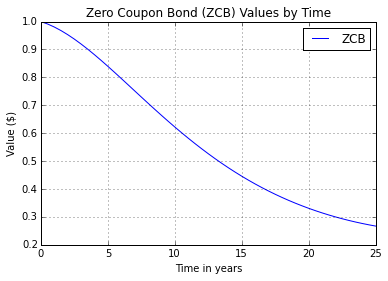

In [15]:
%matplotlib inline

Ts = np.r_[0.0:25.5:0.5]
zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

import matplotlib.pyplot as plt
plt.title("Zero Coupon Bond (ZCB) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()

<big>Above graph is the output for the preceding commands</big>

# Value of early-exercise

<big>
Issuers of callable bonds may redeem the bond at an agreed price as specified in the contract. To 

Price such a bond, the discounted early-exercise values 

<b>can be defined</b> as:

$ discounted early exercise value = ke^{-rt} $

Here, $k$ is the price ratio of the strike price to the par value and $r$ is the interest rate for the strike price

Python implementation of the arly-exercise option can then be written as follows:

</big>

In [17]:
import math
def exercise_value(K, R, t):
    return K* math.exp(-R*t)

# $x , y_{server} = {width_{natural}\over width_{scaled}} \times {x, y_{client}} $

# $  mul-TITOUCH$

<big>In the preceding 

example,

<b>we are interested</b> in valuing a cal option with a strike ratio of <pre>0.95</pre> and 

<b>initial interest</b> rate of 1.5 percent


<b>We can</b> then plot the values as a function of time and superimpose them onto a graph of 0 zero-coupon bodn prices to give us a better visual representation of the relationship between 0 zero-coupon bond prices and callable bond prices</big>

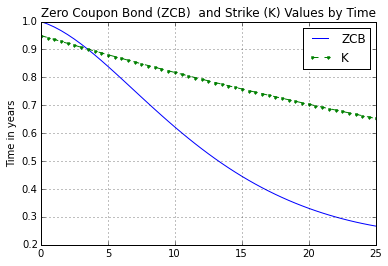

In [24]:
Ts = np.r_[0.0:25.5:0.5]
Ks = [exercise_value(0.95, 0.015, t) for t in Ts]

zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

import matplotlib.pyplot as plt
plt.title("Zero Coupon Bond (ZCB) " 
          " and Strike (K) Values by Time")

plt.plot(Ts, zcbs, label='ZCB')
plt.plot(Ts, Ks , label='K', linestyle="--", marker=".")
plt.ylabel("Value ($)")
plt.ylabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()

<big>From the preceding graph,


<b>we can approximate</b> the price of callable 0 zero-coupon bond prices. Since the bond issuer owns the call, the price of the callable 0 zero-coupon bond 

<b>can be stated </b> as:

## $ callable zero coupon bond price = \text{min} ( ZCB, K) $

Callable bond price is an approximation, given the current interest rate level

Next step would be to treat early-exercise by going through a form of policy iteration, which is a cycle used to determine optimum early-exercise values and their effect on other nodes, and check whether they become due for an early exercise. interest

practice, such an iteration only occurs once

# Policy iteration by finite differences

So far,

<b>We have used</b> the Vasicek model in our short rate process for modeling a 0 zero-coupon bond

<b>We can undergo</b> policy iteration by finite differences to check for early-exercise conditions and their effect on other nodes

<b>We will use</b> the implicit method of finite differences for the numerical 

<b>Pricing procedure</b> as discussed in <i>Chapter 4 , Numerical Procedures</i>

Let's

<b>create a class</b> name <pre>VasicekCZCB</pre> that

<b>will incorporate all </b> the methods used for implementing the pricing of callable 0 zero-coupon bonds by the Vasicek model

Full Python code of this class can be found at the end of this section


Methods used are as follows:


+ <pre>vasicek_czcb_values(self, r0, R, ratio, T, sigma, kappa, theta, M, prob=1e-6, max_policy_iter=10, grid_struct_const=0.25,rs=None):</pre>

This method is the point of entry to kick-start the pricing process 


The variable <pre>r0</pre> is the short-rate at time $t = 0$;


<pre>R</pre> is the strike zero rate for the bond price


<pre>ratio</pre> is the strike price per par value of the bond


<pre>T</pre> is the time to maturity


<pre>sigma</pre>   is the volatility of the short rate $r$


<pre>kappa</pre> is the rate of the mean reversion


<pre>theta</pre>  is th emean of the short rate process


<pre>M</pre> is the number of steps in the finite differences scheme


<pre>prob</pre> probability on the normal distribution curve used by the <pre> vasicek_limits</pre> method to determine short rates


<pre>max_policy_iter</pre> is the maximum number of policy iterations used to find early-exercise nodes


<pre>grid_struct_const</pre> is the maximum threshold of <pre>ddt</pre> movement that determines <pre>N</pre> in the <pre>calculate_N</pre> method


<pre>rs</pre> is the list of interest rates from w hich the short rate process follows.


This method returns a list of evenly spaced short rates and a list of option prices



</big>

# $ cell size = { { board size - {(number of cells + 1 )} \times spacing } \over {\# of Cells} } $

+ <pre>vasicek_params(self, r0, M, sigma, kappa, theta, T, prob, grid_struct_const=0.25, rs = None):</pre>:

<big>
This method computes the implicit scheme parameters for the Vasicek Model 

It returns comma-sepearted values of 

<pre> r_min, dr, N, </pre> and <pre> dt</pre>


If no value is supplied to <pre>rs</pre> , values of <pre>r_min</pre> to <pre>r_max</pre> 

will be automatically generated by the <pre>vasicek_limits</pre> method as a function of 

<pre>prob</pre> following a normal distribution
</big>


+ <pre>vasicek_limits(self, r0,  sigma, kappa, theta, T, prob=1e-6): </pre>

This method computes the minimum and maximum of the Vasicek interest rate process by normal distribution process. Expected value of the short rate process <pre>r(t)</pre> under the Vasicek model is given as:

# $ E\big[ r (t) \big] = \theta + (r_0 - \theta) e ^{-kt} $

Variance is defined as:


# $  Var\big[ r(t) \big]  =  { \sigma^2 \over {2k}} ( 1 - e ^ {-2kt}) $

Function returns a tuple of the minmum and maximum interest rate level as defined by the probability for the normal distribution process


+ <pre>vasicek_diagonals(self,  sigma, kappa, r_min, dr, N, dtau): </pre>

This method returns the diagonals of the implicit scheme of finite differences, where:


## $ sub - diagonals , a = k(\theta - r_i) { {dt \over {2dr} } - { 1 \over 2 } \sigma^2 { dt \over {dr^2}}} $














## $ diagonals , b = 1 + r_idt + \sigma^2 {dt \over {dr^2}} $












## $ sub - diagonals , c = k(\theta - r_i) { {dt \over {2dr} } - { 1 \over 2 } \sigma^2 { dt \over {dr^2}}}  $



Boundary conditions are implemented using Neumann boundary conditions 
</big>



+ <pre>check_exercise(self, V , eex): </pre>

This method returns a list of Boolean values, 

indicating the indices suggesting optimum payoff from an early exercise



+ <pre>check_call_price(self, R , ratio, tau): </pre>

This method returns the discounted value of the strike price as a ratio












+ <pre>vasicek_policy_diagonals(self, subdiagonal, diagonal, superdiagonal, v_old, v_new, eex): </pre>

This method is used by the policy iteration procedure that updates the sub-diagonals, diagonals, and super diagonals for 1 one iteration

In indices, where an early exercise is carried out , the
sub-diagonals and super diagonals will have these values set to 0 and the remaining values on the diagonal. The method returns comma-separated values of the new sub-diagonal, daigonal, and super-diagonal values 







+ <pre>iterate(self, subdiagonal, diagonal, superdiagonal, v_old, eex, max_policy_iter=10): </pre>

This method performs the implicit scheme of finite differences by performing a policy iteration,

where each cycle 

involves solving the tridiagonal systems of equations, calling the <pre> vasicek_policy<pre> 0 zero-coupon bond price if there are no further early-exercise opportunities , it also

returns the number of policy iterations performed.











+ <pre> tridiagonal_solve(self, a, b, c, d): </pre> this is the

implementation of the Thomas algorithm for solving tridiagonal systems of equations. The systems of equations may be written as:

## $ a_i x_{i - 1} + b_ix_i + c_i a_i x_{i + 1} = d_1 $






Equation form is represented in matrix form:



\begin{bmatrix}
b_1 & c_1 & 0 & 0\\
a_2 & b_2 & \ddots & 0\\
0 & \ddots & \ddots & c_{n-1}\\
0 & 0 & a_n & b_n\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_1 \\
\vdots \\
x_n \\
\end{bmatrix}=
\begin{bmatrix}
d_1 \\
d_1 \\
\vdots \\
d_n \\
\end{bmatrix}



Here, $a$ is a list for the sub-diagonals, $b$ is a list for the diagonal and $c$ is the superdiagonal of the matrix 









With these methods defined,


<b>we can now run</b> our code and

price a callable 0 zero-coupon bond by the Vasicek model 




In [5]:
""" Price a callable 0 coupon bond by the Vasicek model """

import math
import numpy as np
import scipy.stats as st

class VasicekZCB:

    def __init__(self):
        self.norinv = st.distributions.norm.ppf
        self.norm = st.distributions.norm.cdf


    def vasicek_czcb_values(self, r0, R, ratio, T, sigma, kappa,
                            theta, M, prob=1e-6, max_policy_iter=10,
                            grid_struct_const=0.25, rs=None):
        r_min, dr, N, dtau = \
            self.vasicek_params(r0, M, sigma, kappa, theta,
                                T, prob, grid_struct_const, rs)
        r = np.r_[0:N]*dr + r_min

        v_mplus1 = np.ones(N)

        for i in range(1, M+1):
            K = self.exercise_call_price(R, ratio, i*dtau)
            eex = np.ones(N) * K
            subdiagonal, diagonal, superdiagonal = \
                self.vasicek_diagonals(sigma, kappa, theta,
                    r_min, dr, N, dtau)

            v_mplus1, iterations = \
                self.iterate(subdiagonal, diagonal, superdiagonal, 
                             v_mplus1, eex, max_policy_iter)

            return r, v_mplus1

        def vasicek_params(self, r0, M, sigma, kappa, theta, T, prob,
                           grid_struct_const=0.25, rs=None):
            
            (r_min, r_max) = (rs[0], rs[-1]) if not rs in None \
                else self.vasicek_limits(r0, sigma, kappa, theta, T, prob)

            dt = T / float(M)
            N  = self.calculate_N(grid_struct_const, dt, sigma, 
                                  r_max, r_min)
            dr = (r_max - r_min) / (N-1)
            return r_min, dr, N, dt


        def calculate_N(self, max_structure_const, dt, sigma, r_max, r_min):

            N = 0

            while True:
                N += 1

                grid_structure_interval = dt * (sigma**2) / (
                    (( r_max - r_min) /float(N))** 2)

                if grid_struct_interval > max_structure_const:
                    break

                return N


        def vasicek_limits(self, r0, sigma, kappa,
                           theta, T, prob=1e-6):
            er = theta + (r0 - theta) * math.exp(-kappa*T)
            variance = (sigma**2) * T if kappa == 0 else\
                       (sigma**2) / (2*kappa) * (1-math.exp(-2*kappa*T))
            stdev = math.sqrt(variance)
            r_min = self.norminv(prob, er, stdv)
            r_max = self.norminv(1 - prob, er, stdev)
            return r_min, r_max

        def vasicek_diagonals(self, sigma, kappa, theta,
                              r_min, dr, N, dtau):
            rn = np.r_[0:N] * dr + r_min
            subdiagonals = kappa * (theta - rn) * dtau/(2 * dr) - \
                           0.5 * (sigma**2) * dtau/ (dr**2)
            diagonals = 1 + rn*dtau + sigma ** 2 * dtau / (dr**2)

        superdiagonals = -kappa * (theta -rn) * dtau / (2 * dr) - \
                          0.5  *  (sigma **2) * dtau / (dr **2)

        # Implement boundary conditions
        if N > 0:
            V_subd0 = subdiagonals[0]
            subdiagonals[0] = superdiagonals[0] - \
                              subdiagonals[0]
            diagonals[0]  += 2*V_subd0
            subdiagonals[0]= 0

        if N > 1:
            v_superd_last = superdiagonals[-1]
            superdiagonals[-1] = superdiagonals[-1] - \
                                 subdiagonals[-1]

            diagonals[-1] += 2*v_superd_last
            superdiagonals[-1] = 0

        return subdiagonals, diagonals, superdiagonals

    def check_exercise(self, V, eex):
        return V > eex

    def exercise_call_price(self, R, ratio, tau):
        K = ratio*np.exp(-R *tau)
        return K

    def exercise_call_price(eslf, R, ratio, tau):
        K = ratio.np.exp(-R * tau)

        return K

    def vasicek_policy_diagonals(self, subdiagonal, diagonal, superdiagonal, v_old, v_new, eex):
        has_early_exercise = self.check_exercise(v_new, eex)
        subdiagonal[has_early_exercise]  = 0
        superdiagonal[has_early_exercise]= 0
        policy = v_old /eex
        policy_values = policy[has_early_exercises]
        diagonal[has_early_exercise] =policy_values

        return subdiagonal, diagonal, superdiagonal

    def iterate(self, subdiagonal, diagonal, superdiagonal, 
                v_old, eex, max_policy_iter=10):

        v_mplus1 = v_old
        v_m = v_old
        change = np.zeros(len(v_old))
        prev_changes = np.zeros(len(v_old))
        
        iterations = 0
        while iterations <= max_policy_iter:
            iteration += 1

            v_mplus1 = self.tridiagonal_solve(subdiagonal,
                                              superdiagonal,
                                              v_mplus1, eex)

            change[is_eex] = 1

            if iterations > 1:
                change[v_mplus1 != v_m] = 1


            is_no_more_eex = False if True in is_eex else True

            if is_no_more_eex:
                break

            v_mplus1[is_eex] = eex[is_eex]
            changes = (change == prev_changes)
            
            is_no_further_changes = all((x == 1) for x in changes)

            if is_no_further_changes:
                break
                
            prev_changes = change
            v_m = v_mplus1

        def tridiagonal_solve(self, a, b, c, d):
            nf = len(a) # Number of equations
            ac, bc, cc, dc = map(np.array, (a,b, c, d)) # Copy the array

            for it in xrange(1 , nf):
                mc = ac[it]/bc[it-1]
                bc[it] = bc[it] - mc*cc[it-1]
                dc[it] = dc[it] - mc*dc[it-1]

            xc = ac
            xc[-1] = dc[-1]/bc[-1]

            for i1 in xrange(nf-2, -1, -1):
                xc[i1] = (dc[i] -cc[i] * xc[i + 1]) / bc[i1]

            del bc, cc, dc # Delete variables from memory

            return xc


<big> Assume? that

<b>We run</b> this model with the parameters:

<pre>r0 = 0.05</pre>,

<pre>R = 0.05</pre>,

<pre>ratio = 0.95</pre>,

<pre>sigma = 0.03</pre>,


<pre>kappa = 0.15</pre>,


<pre>theta = 0.05</pre>,


<pre>prob = 1e-6</pre>,


<pre>M = 250</pre>,


<pre>max_policy_iter = 10</pre>,


<pre>grid_struc_interval = 0.25</pre>, and


<b> we are interested</b> in the values of the interest rates between 0 percent and 2 percent


Following Python code demonstrates this model for maturities of 

1 year,
5 years,
7 years,
10 years, and
20 years:

In [6]:
r0 = 0.05
R  = 0.05
ratio = 0.95
sigma = 0.03
kappa = 0.15
theta = 0.05
prob  = 1e-6
M = 250
max_policy_iter = 10
grid_struct_interval = 0.25
rs = np.r_[0.0:2.0:0.1]


Vasicek = VasicekCZCB() 
r, vals = Vasicek.vasicek_czcb_values(r0, R, ratio, 1.,
                                        sigma, kappa, theta,
                                        M, prob,
                                        max_policy_iter,
                                        grid_struct_interval,
                                        rs)

import matplotlib.pyplot as py
plt.title('Callable Zero Coupon Bond Values by r')

for T in [5., 7. , 10., 20.]:
    r, vals = \
        Vasicek.vasicek_czcb_values(r0, R, ratio, 1.,
                                        sigma, kappa, theta,
                                        M, prob,
                                        max_policy_iter,
                                        grid_struct_interval,
                                        rs)
    plt.plot(r, vals, label=str(t) + ' yr',
             linestyle='--', marker='.')

plt.ylabel("Value ($)")
plt.xlabel("r")
plt.grid(True)
plt.show()


NameError: name 'VasicekCZCB' is not defined

![]('https://images.craigslist.org/00x0x_7Bt6N0pcu3rz_0ak07K_300x300.jpg')

# Other considerations in callable bond pricing
<big>in

Pricing callable 0 zero-coupon bonds,


<b>We used</b> the Vasicek interest rate process to 


model interest rate movement with the aid of a normal distribution process


<b>We have earlier</b> demonstrated the Vasicek 


<b>model can produce</b> negative interest rates, which may not 


<b> be practical </b> for most economic cycles


Quantitative analysts often use more than one model in derivative pricing to obtain realistic resultsas much as possible. The 


CIR and Hull-w models are some of the commonly discussed models in financial studies. The


Limitation of these models is that they involve only 1 one factor, or a single source of uncertainty


<b>We also looked</b> at the implicit scheme of finite differences for policy iteration of early exercises. Another method of consideration is the

CR Crank-Nicolson method of finite differences. Other methods include the Monte Carlo simulation for calibration of this model
</big>


<big>
Finally,

<b>we obtained</b> a final list of short rates and callable bond prices. To


Infer? a fair value of the callable bond for aparticular short rate, interpolation of the list of bond prices is required. 


Often, the linear interpolation method is used?  Other

interpolation methods of consideration are the cubic and spline interpolation methods

# Summary

<b> We focused </b> obtained

<b> interest rate</b> and related derivative pricing with Python


Most bonds, such as US Treasury bonds, pay a fixed amount of interest semi-annually while other bonds may pay quarterly, or annually. It is a 


Characteristic of bonds that their prices are

<b>closely related</b> to current interest rate levels in an inversely related manner.  The 


Normal or positive yield curve ,where long-term interest rates are higher than short-term interest rates, is said to be upward sloping. In


Certain economic conditions, the yield curve 


<b>can be </b> inverted and is said to be downward sloping. A 

0 zero-coupon bond is a bond that pays no coupons during its lifetime, except on maturity when the principal or face value is repaid


<b>We implemented </b> a simple 0 zero-coupon bond calculator in Python. The


yield curve

<b> can be derived</b> from the short-term 0 zero or spot rates of securities such as 0 zero-coupon bonds, T-bills, notes, and Eurodollar deposits using a bootstrapping process


<b>Using Python</b>


<b>We used </b> a lot of bond information to plot a yield curve, and derived forward rates, yield-to-maturity, and bond prices from the yield curve


2 Two important metrics to bond traders are duration and convexity.

<b>Duration</b> is a 


Sensitivity measure of the duration of a bond to yield changes


<b>We implemented</b> calculations using the modified duration model and convexity calculator in Python

Short rate models are frequently used in the evaluation of interest rate derivatives

<b>Interest rate modeling</b> is a fairly complex topic since they are affected by a multitude of factors, such as economic states, political decisions, goverment intervention, and the laws of supply and demand. A 


number of interest rate models have been proposed to account for various characteristics of interest rates. Some of the interest rate models 


<b>We have</b> discussed are the Vasicek model, CIR model, and Rendlemen and Bartter model.

Bond issuers may embed options within a bond to allow them the right, but not the obligation to 

buy or sell the issued bond at a predetermined price during a specified period time. The price of a callable bond 


<b>can be thought</b> of as the price difference of a bond without an option and the price of the embedded call option

Using Python,

<b>we took a look</b> at pricing a callable 0 zero-coupon bond by applying the Vasicek model to the implicit method of finite differences. This method is, however, just one of the may methods that quantitative analysts use in bond options modeling

Next chapter, 

<b>We will</b> explore analytics with Python and VSTOXX
</big>